#### Here we first import relavant python libraries to support our project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as mpl
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
#We import all the required libraries 

####  Here we import the DR-TB dataset and checking the columns and shape of the dataset.Our dataset has 724 records(row) and 36 cloumns(features)

In [2]:
import pandas

df = pandas.read_excel(r"C:\Analytics & codes\DR_TB.xlsx", sheet_name='DR_TB')
df

,demographic/Age,demographic/Sex,demographic/_1_11_Marital_Status,clinicalandlabdata/Date_of_diagnosis,clinicalandlabdata/Date_treatment_started,Turn around time,clinicalandlabdata/Does_patient_have_pr_ry_or_secondary_DRTB,clinicalandlabdata/Was_patient_diagnosed_at_facil,clinicalandlabdata/GeneXpert_results,clinicalandlabdata/Site_of_TB_disease,...,treatmentmonitor/microscopy/Month_8_001,treatmentmonitor/microscopy/Month_9_001,treatmentmonitor/microscopy/Month_10_001,treatmentmonitor/Admission_during_treatment_per,treatmentmonitor/Treatment_interruption,treatmentmonitor/Regimen_Change,treatmentmonitor/_6_23_Interim_outcomes_using_smear,treatmentmonitor/_6_24_Interim_outcomes_using_culture,treatmentmonitor/_6_28_Interim_outcome,_6_29_Final_outcome
0,41,Male,No Data,2019-12-18,2019-12-19,1,Primary,yes__patient_presented_with_sy,mtb_detected_low__rr_detected,pulmonary,...,no_data,no_data,no_data,no_data,no_data,no,smear_negative,no_data,improving,died
1,34,Female,Married,2019-10-29,2019-11-22,24,Primary,yes__patient_presented_with_sy,mtb_detected_low__rr_detected,pulmonary,...,negative,negative,negative,yes,no,no,smear_negative,sputum_conversion,improving,died
2,49,Male,Married,2019-12-19,2020-01-06,18,Primary,yes__patient_presented_with_sy,mtb_detected_low__rr_detected,pulmonary,...,negative,negative,negative,no,no,no,smear_negative,sputum_conversion,improving,died
3,20,Female,No Data,2019-10-23,2019-10-28,5,Primary,yes__patient_presented_with_sy,mtb_detected_low__rr_detected,pulmonary,...,no_data,no_data,no_data,yes,no,no,smear_negative,no_data,improving,completed_treatment
4,41,Female,Single,2020-03-10,2020-03-13,3,Primary,yes__patient_presented_with_sy,mtb_detected_high__rr_detected,pulmonary,...,negative,negative,negative,no,no,no,smear_negative,sputum_non_conversion,improving,completed_treatment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,45,Male,Married,2019-11-11,2019-12-06,25,Primary,yes__patient_presented_with_sy,resistance_other_than_rif__mono_resistan,pulmonary,...,NaN,NaN,NaN,no,no,no,smear_negative,sputum_conversion,improving,died
720,42,Female,No Data,2020-01-24,2020-02-10,17,Secondary,yes__patient_presented_with_sy,mtb_detected_positive,pulmonary,...,no_data,positive,positive,no,yes,no,smear_positive,sputum_non_conversion,failed_treatment,died_1
721,45,Male,Married,2018-10-25,2018-10-31,6,Secondary,yes__patient_presented_with_sy,mtb_medium,pulmonary,...,no_data,no_data,no_data,no_data,no_data,no,no_data,sputum_conversion,NaN,completed_treatment
722,35,Male,Single,2020-03-11,2022-03-17,736,Primary,yes__patient_presented_with_sy,mtb_detected_positive,pulmonary,...,no_data,no_data,no_data,no,no,no,smear_negative,sputum_conversion,improving,completed_treatment


In [3]:
df.shape

(724, 36)

In [4]:
# iterating the columns
for col in df.columns:
    print(col)

demographic/Age
demographic/Sex
demographic/_1_11_Marital_Status
clinicalandlabdata/Date_of_diagnosis
clinicalandlabdata/Date_treatment_started
Turn around time
clinicalandlabdata/Does_patient_have_pr_ry_or_secondary_DRTB
clinicalandlabdata/Was_patient_diagnosed_at_facil
clinicalandlabdata/GeneXpert_results
clinicalandlabdata/Site_of_TB_disease
clinicalandlabdata/Type_of_patient
clinicalandlabdata/Initial_Treatment_regimen
pastmedicalhistory/HIV_Status
pastmedicalhistory/_3_6_Regime_type_of_ART
pastmedicalhistory/Previous_History_of_TB
socialhistory/Education
treatmentmonitor/DOT_support
treatmentmonitor/Receive_monthly_food_voucher
treatmentmonitor/microscopy/Month_1_001
treatmentmonitor/microscopy/Month_1_001_001
treatmentmonitor/microscopy/Month_2_001
treatmentmonitor/microscopy/Month_3_001
treatmentmonitor/microscopy/Month_4_001
treatmentmonitor/microscopy/Month_5_001
treatmentmonitor/microscopy/Month_6_001
treatmentmonitor/microscopy/Month_7_001
treatmentmonitor/microscopy/Month_8

In [5]:
col=df.columns
col

Index(['demographic/Age', 'demographic/Sex',
       'demographic/_1_11_Marital_Status',
       'clinicalandlabdata/Date_of_diagnosis',
       'clinicalandlabdata/Date_treatment_started', 'Turn around time',
       'clinicalandlabdata/Does_patient_have_pr_ry_or_secondary_DRTB',
       'clinicalandlabdata/Was_patient_diagnosed_at_facil',
       'clinicalandlabdata/GeneXpert_results',
       'clinicalandlabdata/Site_of_TB_disease',
       'clinicalandlabdata/Type_of_patient',
       'clinicalandlabdata/Initial_Treatment_regimen',
       'pastmedicalhistory/HIV_Status',
       'pastmedicalhistory/_3_6_Regime_type_of_ART',
       'pastmedicalhistory/Previous_History_of_TB', 'socialhistory/Education',
       'treatmentmonitor/DOT_support',
       'treatmentmonitor/Receive_monthly_food_voucher',
       'treatmentmonitor/microscopy/Month_1_001',
       'treatmentmonitor/microscopy/Month_1_001_001',
       'treatmentmonitor/microscopy/Month_2_001',
       'treatmentmonitor/microscopy/Month_3_00

here we begin data cleaning.We remove all the columns or features that wont impact the predection of treatment outcomes.We also rename the features/Columns properly.To manage our data in python,we further mapp all the variables with numbers for each columns that have string variables.This is to enables us conduct statistical and machine learning calculations.

In [6]:
#df.drop(df.iloc[:,3:5], inplace=True, axis=1)

df_DR_TB = df.drop(['clinicalandlabdata/Date_of_diagnosis',
              'clinicalandlabdata/Date_treatment_started',
              'clinicalandlabdata/Was_patient_diagnosed_at_facil',
              'socialhistory/Education',
              'pastmedicalhistory/Previous_History_of_TB','treatmentmonitor/DOT_support',
       'treatmentmonitor/Receive_monthly_food_voucher',
       'treatmentmonitor/microscopy/Month_1_001',
       'treatmentmonitor/microscopy/Month_1_001_001',
       'treatmentmonitor/microscopy/Month_2_001',
       'treatmentmonitor/microscopy/Month_3_001',
       'treatmentmonitor/microscopy/Month_4_001',
       'treatmentmonitor/microscopy/Month_5_001',
       'treatmentmonitor/microscopy/Month_6_001',
       'treatmentmonitor/microscopy/Month_7_001',
       'treatmentmonitor/microscopy/Month_8_001',
       'treatmentmonitor/microscopy/Month_9_001',
       'treatmentmonitor/microscopy/Month_10_001',
       'treatmentmonitor/Admission_during_treatment_per',
       'treatmentmonitor/Treatment_interruption',
       'treatmentmonitor/Regimen_Change',
       'treatmentmonitor/_6_23_Interim_outcomes_using_smear',
       'treatmentmonitor/_6_24_Interim_outcomes_using_culture',
       'treatmentmonitor/_6_28_Interim_outcome'], axis=1)
df_DR_TB


,demographic/Age,demographic/Sex,demographic/_1_11_Marital_Status,Turn around time,clinicalandlabdata/Does_patient_have_pr_ry_or_secondary_DRTB,clinicalandlabdata/GeneXpert_results,clinicalandlabdata/Site_of_TB_disease,clinicalandlabdata/Type_of_patient,clinicalandlabdata/Initial_Treatment_regimen,pastmedicalhistory/HIV_Status,pastmedicalhistory/_3_6_Regime_type_of_ART,_6_29_Final_outcome
0,41,Male,No Data,1,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,unkown,NaN,died
1,34,Female,Married,24,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,negative,1.0,died
2,49,Male,Married,18,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,unkown,NaN,died
3,20,Female,No Data,5,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,postive,NaN,completed_treatment
4,41,Female,Single,3,Primary,mtb_detected_high__rr_detected,pulmonary,New,1,negative,0.0,completed_treatment
...,...,...,...,...,...,...,...,...,...,...,...,...
719,45,Male,Married,25,Primary,resistance_other_than_rif__mono_resistan,pulmonary,New,1,postive,NaN,died
720,42,Female,No Data,17,Secondary,mtb_detected_positive,pulmonary,After Failure Of First Line,1,negative,1.0,died_1
721,45,Male,Married,6,Secondary,mtb_medium,pulmonary,Retreatment,1,negative,1.0,completed_treatment
722,35,Male,Single,736,Primary,mtb_detected_positive,pulmonary,New,1,negative,1.0,completed_treatment


Below is the dictionary for renaming the columns

In [7]:
col={'demographic/Age':'Age',
'demographic/Sex':'Sex',
'demographic/_1_11_Marital_Status':'Marital Status',
'clinicalandlabdata/Does_patient_have_pr_ry_or_secondary_DRTB':'Primary or secondary DRTB',   
'clinicalandlabdata/GeneXpert_results':'GeneXpert_results',
'clinicalandlabdata/Site_of_TB_disease':'Site of TB',
'clinicalandlabdata/Type_of_patient':'Type_of_patient',
'clinicalandlabdata/Initial_Treatment_regimen':'Treatment regimen',
'pastmedicalhistory/HIV_Status':'HIV Status',
'pastmedicalhistory/_3_6_Regime_type_of_ART':'ART Regimen',
'pastmedicalhistory/Previous_History_of_TB':'Had TB previously',
'_6_29_Final_outcome':'Treatment Outcome'}

In [8]:
'''
This code has been commented out
col={'demographic/Age':'Age',
'demographic/Sex':'Sex',
'demographic/_1_11_Marital_Status':'Marital Status',
'clinicalandlabdata/Does_patient_have_pr_ry_or_secondary_DRTB':'Primary or secondary DRTB',   
'clinicalandlabdata/GeneXpert_results':'GeneXpert_results',
'clinicalandlabdata/Site_of_TB_disease':'Site of TB',
'clinicalandlabdata/Type_of_patient':'Type_of_patient',
'clinicalandlabdata/Initial_Treatment_regimen2':'Treatment regimen',
'pastmedicalhistory/HIV_Status':'HIV Status',
'pastmedicalhistory/_3_6_Regime_type_of_ART':'ART Regimen',
'pastmedicalhistory/Previous_History_of_TB':'Had TB previously',
'socialhistory/Education':'Education',
'treatmentmonitor/DOT_support':'Mode of DOT support',
'treatmentmonitor/Receive_monthly_food_voucher':'On food voucher',
'treatmentmonitor/microscopy/Month_1_001':'Initial microscopy results',
'treatmentmonitor/microscopy/Month_1_001_001':'First microscopy results',
'treatmentmonitor/microscopy/Month_2_001':'Second microscopy results',
'treatmentmonitor/microscopy/Month_3_001':'Third microscopy results',
'treatmentmonitor/microscopy/Month_4_001':'Fourth microscopy results',
'treatmentmonitor/microscopy/Month_5_001':'Fifth microscopy results',
'treatmentmonitor/microscopy/Month_6_001':'Sixth microscopy results',
'treatmentmonitor/microscopy/Month_7_001':'Seventh microscopy results',
'treatmentmonitor/microscopy/Month_8_001':'Eighth microscopy results',
'treatmentmonitor/microscopy/Month_9_001':'Ninth microscopy results',
'treatmentmonitor/microscopy/Month_10_001':'Tenth microscopy results',
'treatmentmonitor/Admission_during_treatment_per':'Admission during DR_TB treatment',
'treatmentmonitor/Treatment_interruption':'DR_TB Treatment interruption',
'treatmentmonitor/Regimen_Change':'Regimen_Change',
'_6_29_Final_outcome':'Treatment Outcome'}

'''

"\nThis code has been commented out\ncol={'demographic/Age':'Age',\n'demographic/Sex':'Sex',\n'demographic/_1_11_Marital_Status':'Marital Status',\n'clinicalandlabdata/Does_patient_have_pr_ry_or_secondary_DRTB':'Primary or secondary DRTB',   \n'clinicalandlabdata/GeneXpert_results':'GeneXpert_results',\n'clinicalandlabdata/Site_of_TB_disease':'Site of TB',\n'clinicalandlabdata/Type_of_patient':'Type_of_patient',\n'clinicalandlabdata/Initial_Treatment_regimen2':'Treatment regimen',\n'pastmedicalhistory/HIV_Status':'HIV Status',\n'pastmedicalhistory/_3_6_Regime_type_of_ART':'ART Regimen',\n'pastmedicalhistory/Previous_History_of_TB':'Had TB previously',\n'socialhistory/Education':'Education',\n'treatmentmonitor/DOT_support':'Mode of DOT support',\n'treatmentmonitor/Receive_monthly_food_voucher':'On food voucher',\n'treatmentmonitor/microscopy/Month_1_001':'Initial microscopy results',\n'treatmentmonitor/microscopy/Month_1_001_001':'First microscopy results',\n'treatmentmonitor/microscopy

In [9]:
#Here we rename our columns
df_DR_TB=df_DR_TB.rename(columns=col)
df_DR_TB

,Age,Sex,Marital Status,Turn around time,Primary or secondary DRTB,GeneXpert_results,Site of TB,Type_of_patient,Treatment regimen,HIV Status,ART Regimen,Treatment Outcome
0,41,Male,No Data,1,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,unkown,NaN,died
1,34,Female,Married,24,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,negative,1.0,died
2,49,Male,Married,18,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,unkown,NaN,died
3,20,Female,No Data,5,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,postive,NaN,completed_treatment
4,41,Female,Single,3,Primary,mtb_detected_high__rr_detected,pulmonary,New,1,negative,0.0,completed_treatment
...,...,...,...,...,...,...,...,...,...,...,...,...
719,45,Male,Married,25,Primary,resistance_other_than_rif__mono_resistan,pulmonary,New,1,postive,NaN,died
720,42,Female,No Data,17,Secondary,mtb_detected_positive,pulmonary,After Failure Of First Line,1,negative,1.0,died_1
721,45,Male,Married,6,Secondary,mtb_medium,pulmonary,Retreatment,1,negative,1.0,completed_treatment
722,35,Male,Single,736,Primary,mtb_detected_positive,pulmonary,New,1,negative,1.0,completed_treatment


In [10]:
# iterating the columns
# List of features that we are going to use for the model bur  we still remove drugs because most of the records are missing
for col in df_DR_TB.columns:
    print(col)


Age
Sex
Marital Status
Turn around time
Primary or secondary DRTB
GeneXpert_results
Site of TB
Type_of_patient
Treatment regimen
HIV Status
ART Regimen
Treatment Outcome


In [11]:
#Make sure the index is 8 here.So that we drop column 8 
#index_no = df_DR_TB.columns.get_loc('Treatment regimen')
#index_no

df=df_DR_TB
df

,Age,Sex,Marital Status,Turn around time,Primary or secondary DRTB,GeneXpert_results,Site of TB,Type_of_patient,Treatment regimen,HIV Status,ART Regimen,Treatment Outcome
0,41,Male,No Data,1,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,unkown,NaN,died
1,34,Female,Married,24,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,negative,1.0,died
2,49,Male,Married,18,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,unkown,NaN,died
3,20,Female,No Data,5,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,postive,NaN,completed_treatment
4,41,Female,Single,3,Primary,mtb_detected_high__rr_detected,pulmonary,New,1,negative,0.0,completed_treatment
...,...,...,...,...,...,...,...,...,...,...,...,...
719,45,Male,Married,25,Primary,resistance_other_than_rif__mono_resistan,pulmonary,New,1,postive,NaN,died
720,42,Female,No Data,17,Secondary,mtb_detected_positive,pulmonary,After Failure Of First Line,1,negative,1.0,died_1
721,45,Male,Married,6,Secondary,mtb_medium,pulmonary,Retreatment,1,negative,1.0,completed_treatment
722,35,Male,Single,736,Primary,mtb_detected_positive,pulmonary,New,1,negative,1.0,completed_treatment


In [12]:
df = df.round(0)
df

,Age,Sex,Marital Status,Turn around time,Primary or secondary DRTB,GeneXpert_results,Site of TB,Type_of_patient,Treatment regimen,HIV Status,ART Regimen,Treatment Outcome
0,41,Male,No Data,1,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,unkown,NaN,died
1,34,Female,Married,24,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,negative,1.0,died
2,49,Male,Married,18,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,unkown,NaN,died
3,20,Female,No Data,5,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,postive,NaN,completed_treatment
4,41,Female,Single,3,Primary,mtb_detected_high__rr_detected,pulmonary,New,1,negative,0.0,completed_treatment
...,...,...,...,...,...,...,...,...,...,...,...,...
719,45,Male,Married,25,Primary,resistance_other_than_rif__mono_resistan,pulmonary,New,1,postive,NaN,died
720,42,Female,No Data,17,Secondary,mtb_detected_positive,pulmonary,After Failure Of First Line,1,negative,1.0,died_1
721,45,Male,Married,6,Secondary,mtb_medium,pulmonary,Retreatment,1,negative,1.0,completed_treatment
722,35,Male,Single,736,Primary,mtb_detected_positive,pulmonary,New,1,negative,1.0,completed_treatment


In [13]:
for Col in df:
  print(df[Col].unique())

[  41   34   49   20   25   26   19    1   24   39   43   45    4   36
   38   22   40   52   16   48   32   31   35   27   29   28   46   42
   30   63    6   57   50   67   17    3   37   47   15   90   51   72
   23   44   55   54   18   70   56   13   21   33   84   58 3871   73
   76   66   60   61   85   64   62   65   59   74   10   75   53]
['Male' 'Female']
['No Data' 'Married' 'Single' 'N A' 'Divorced' 'Widow']
[   1   24   18    5    3    9    0    2   60   23    4   13   11    7
  149  730   31    8  217   64   41   37   35   53   33   14   27  103
  154   25   17    6  736   10  760   21 1097  396   47   52   20  184
  731   15   22   95  735   50  791   30  369   28  857  210   73 1098
   77  366  367   62   16   12  669 1443   61  601  365   72   46  186
   32   38   26  975  197   40   70  424   58  255  909   57   36   34]
['Primary' 'Secondary' 'No_Data' nan]
['mtb_detected_low__rr_detected' 'mtb_detected_high__rr_detected'
 'clinical_diagnosis' 'mtb_detected_trace__r

In [14]:
for Col in list(df.columns):
    print(Col,':', len(df[Col].unique()), 'labels')

Age : 69 labels
Sex : 2 labels
Marital Status : 6 labels
Turn around time : 84 labels
Primary or secondary DRTB : 4 labels
GeneXpert_results : 9 labels
Site of TB : 4 labels
Type_of_patient : 7 labels
Treatment regimen : 2 labels
HIV Status : 4 labels
ART Regimen : 3 labels
Treatment Outcome : 5 labels


In [15]:
mode = df['Turn around time'].mode()[0]
mode

0

In [16]:
for Col in list(df.columns):
    print(dict(df[Col].value_counts()))
    

{39: 31, 45: 30, 30: 30, 35: 29, 40: 29, 42: 29, 37: 27, 46: 27, 28: 26, 32: 25, 36: 23, 38: 22, 29: 22, 34: 20, 43: 19, 48: 17, 24: 17, 23: 17, 25: 16, 33: 15, 20: 14, 22: 14, 41: 13, 47: 13, 50: 12, 44: 11, 31: 11, 26: 10, 27: 10, 55: 9, 57: 8, 49: 8, 51: 8, 16: 7, 54: 7, 52: 7, 60: 6, 19: 6, 4: 6, 15: 6, 63: 5, 67: 5, 18: 5, 6: 5, 61: 4, 72: 4, 3: 4, 21: 3, 65: 3, 17: 3, 90: 3, 56: 3, 1: 2, 13: 2, 84: 2, 3871: 1, 73: 1, 76: 1, 66: 1, 70: 1, 58: 1, 85: 1, 64: 1, 62: 1, 59: 1, 74: 1, 10: 1, 75: 1, 53: 1}
{'Male': 479, 'Female': 245}
{'Married': 270, 'No Data': 203, 'Single': 179, 'Divorced': 31, 'N A': 22, 'Widow': 19}
{0: 199, 2: 82, 1: 73, 3: 54, 4: 40, 5: 27, 6: 25, 7: 21, 9: 17, 8: 15, 14: 7, 13: 7, 11: 7, 10: 7, 31: 7, 20: 5, 37: 5, 15: 4, 24: 4, 736: 4, 17: 4, 154: 4, 27: 4, 21: 4, 23: 4, 35: 4, 60: 3, 12: 3, 28: 3, 22: 3, 53: 3, 18: 3, 149: 3, 33: 3, 64: 3, 217: 3, 730: 3, 25: 3, 41: 3, 103: 3, 367: 2, 735: 2, 30: 2, 61: 2, 365: 1, 72: 1, 46: 1, 26: 1, 601: 1, 186: 1, 32: 1, 38

In [17]:


age={3871:40} 
d1={'Female':0, 'Male':1}
d2={'Single':0,'Married':1,'No Data':0,'Widow':0,'Divorced':0,'N A':0}
d3={'Secondary':0,'Primary':1,'No_Data':1,'nan':0}
d4={'mtb_detected_high__rr_detected':1, 'mtb_detected_low__rr_detected':1,
 'mtb_medium':1,'mtb_detected_rr_indeterminant':1,'clinical_diagnosis':0,
 'mtb_detected_positive':1,'mtb_detected_trace__rr_detected':1,
 'resistance_other_than_rif__mono_resistan':1}
d5={'pulmonary':1,'eptb':0,'nan':1, 'no_data':1}
d6={'Retreatment':1,'New':0,'After Failure Of First Line':1,
 'Other   Previously Treated With Unknown':1, 'Trans In':1, 'After Ltfu':1,'nan':1}
d7={'negative':0, 'postive':1, 'unkown':0}
d8={'Atripula':1, 'TLD':1,'not stated':1, 'TLE':1,'Abc,3tc,lvp/r,septrin':1,
 'Pre HAART':1,'Atripla':1, 'TFF/3TV/DTG':1 ,'Unknown':0 ,'cART':1, 'ATRIPLA':1,
 'First line':1, 'T.L.E':1, 'TĹD':1, 'TDF/3TC/EFV':1,'TLD ':1,
 'AZT/3TC/DTG ':1, 'Atripla ':1, 'Unknown ':1,
 'First line ':1, 'Second line AZT/3TC/DTG':1 ,'Tld':1, '1st line':1 ,'TLE\n':1,
 'TLE but defaulted':1, 'AZT-3TC-LPVr':1, 'TAFED':1,
 'TDF/3TC/DTG':1,
 'Atrpla':1, 'ATRILA ':1, 'Avonza (TDF + 3TC + EFV)':1,
 '1':1, 'TDF,3TC,EFV':1, 'TAfed':1,'No data':1,'No Data':1,'Not indicated ':1,
    'No information':1,'NO Data':1,'Initiated, but regime not indicated':1,
    'No data ':0,'No records':1,'July 2020':1}
d9={'completed_treatment':1,'died':2, 'died_1':2, 'lost_to_follow_up':4,
  'failed_treatment':5}
df.head()


,Age,Sex,Marital Status,Turn around time,Primary or secondary DRTB,GeneXpert_results,Site of TB,Type_of_patient,Treatment regimen,HIV Status,ART Regimen,Treatment Outcome
0,41,Male,No Data,1,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,unkown,NaN,died
1,34,Female,Married,24,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,negative,1.0,died
2,49,Male,Married,18,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,unkown,NaN,died
3,20,Female,No Data,5,Primary,mtb_detected_low__rr_detected,pulmonary,New,1,postive,NaN,completed_treatment
4,41,Female,Single,3,Primary,mtb_detected_high__rr_detected,pulmonary,New,1,negative,0.0,completed_treatment


In [18]:
'''
age={3871:40} 
d1={'Female':0, 'Male':1}
d2={'Single':0,'Married':1,'No Data':0,'Widow':0,'Divorced':0,'N A':0}
d3={'Secondary':0,'Primary':1,'No_Data':1,'nan':0}
d4={'mtb_detected_high__rr_detected':1, 'mtb_detected_low__rr_detected':1,
 'mtb_medium':1,'mtb_detected_rr_indeterminant':1,'clinical_diagnosis':0,
 'mtb_detected_positive':1,'mtb_detected_trace__rr_detected':1,
 'resistance_other_than_rif__mono_resistan':1}
d5={'pulmonary':1,'eptb':0,'nan':1, 'no_data':1}
d6={'Retreatment':1,'New':0,'After Failure Of First Line':1,
 'Other   Previously Treated With Unknown':1, 'Trans In':1, 'After Ltfu':1,'nan':1}
d7={'negative':0, 'postive':1, 'unkown':0}
d8={'Atripula':1, 'TLD':1,'not stated':1, 'TLE':1,'Abc,3tc,lvp/r,septrin':1,
 'Pre HAART':1,'Atripla':1, 'TFF/3TV/DTG':1 ,'Unknown':0 ,'cART':1, 'ATRIPLA':1,
 'First line':1, 'T.L.E':1, 'TĹD':1, 'TDF/3TC/EFV':1,'TLD ':1,
 'AZT/3TC/DTG ':1, 'Atripla ':1, 'Unknown ':1,
 'First line ':1, 'Second line AZT/3TC/DTG':1 ,'Tld':1, '1st line':1 ,'TLE\n':1,
 'TLE but defaulted':1, 'AZT-3TC-LPVr':1, 'TAFED':1,
 'TDF/3TC/DTG':1,
 'Atrpla':1, 'ATRILA ':1, 'Avonza (TDF + 3TC + EFV)':1,
 '1':1, 'TDF,3TC,EFV':1, 'TAfed':1,'No data':1,'No Data':1,'Not indicated ':1,
    'No information':1,'NO Data':1,'Initiated, but regime not indicated':1,
    'No data ':0,'No records':1,'July 2020':1}
d9={'completed_treatment':1,'died':3, 'died_1':3,'cured':2, 'lost_to_follow_up':4,
  'failed_treatment':5}
df.head()
'''

"\nage={3871:40} \nd1={'Female':0, 'Male':1}\nd2={'Single':0,'Married':1,'No Data':0,'Widow':0,'Divorced':0,'N A':0}\nd3={'Secondary':0,'Primary':1,'No_Data':1,'nan':0}\nd4={'mtb_detected_high__rr_detected':1, 'mtb_detected_low__rr_detected':1,\n 'mtb_medium':1,'mtb_detected_rr_indeterminant':1,'clinical_diagnosis':0,\n 'mtb_detected_positive':1,'mtb_detected_trace__rr_detected':1,\n 'resistance_other_than_rif__mono_resistan':1}\nd5={'pulmonary':1,'eptb':0,'nan':1, 'no_data':1}\nd6={'Retreatment':1,'New':0,'After Failure Of First Line':1,\n 'Other   Previously Treated With Unknown':1, 'Trans In':1, 'After Ltfu':1,'nan':1}\nd7={'negative':0, 'postive':1, 'unkown':0}\nd8={'Atripula':1, 'TLD':1,'not stated':1, 'TLE':1,'Abc,3tc,lvp/r,septrin':1,\n 'Pre HAART':1,'Atripla':1, 'TFF/3TV/DTG':1 ,'Unknown':0 ,'cART':1, 'ATRIPLA':1,\n 'First line':1, 'T.L.E':1, 'TĹD':1, 'TDF/3TC/EFV':1,'TLD ':1,\n 'AZT/3TC/DTG ':1, 'Atripla ':1, 'Unknown ':1,\n 'First line ':1, 'Second line AZT/3TC/DTG':1 ,'Tld':

In [19]:

df['Age'].replace(age, inplace=True)
df['Sex'].replace(d1, inplace=True)
df['Marital Status'].replace(d2, inplace=True)
df['Primary or secondary DRTB'].replace(d3, inplace=True)
df['GeneXpert_results'].replace(d4, inplace=True)

df['Site of TB'].replace(d5, inplace=True)
df['Type_of_patient'].replace(d6, inplace=True)
df['HIV Status'].replace(d7, inplace=True)
df['ART Regimen'].replace(d8, inplace=True)


df['Treatment Outcome'].replace(d9, inplace=True)


df


,Age,Sex,Marital Status,Turn around time,Primary or secondary DRTB,GeneXpert_results,Site of TB,Type_of_patient,Treatment regimen,HIV Status,ART Regimen,Treatment Outcome
0,41,1,0,1,1.0,1.0,1.0,0.0,1,0.0,NaN,2
1,34,0,1,24,1.0,1.0,1.0,0.0,1,0.0,1.0,2
2,49,1,1,18,1.0,1.0,1.0,0.0,1,0.0,NaN,2
3,20,0,0,5,1.0,1.0,1.0,0.0,1,1.0,NaN,1
4,41,0,0,3,1.0,1.0,1.0,0.0,1,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
719,45,1,1,25,1.0,1.0,1.0,0.0,1,1.0,NaN,2
720,42,0,0,17,0.0,1.0,1.0,1.0,1,0.0,1.0,2
721,45,1,1,6,0.0,1.0,1.0,1.0,1,0.0,1.0,1
722,35,1,0,736,1.0,1.0,1.0,0.0,1,0.0,1.0,1


In [20]:
df = df.round(0)
df

,Age,Sex,Marital Status,Turn around time,Primary or secondary DRTB,GeneXpert_results,Site of TB,Type_of_patient,Treatment regimen,HIV Status,ART Regimen,Treatment Outcome
0,41,1,0,1,1.0,1.0,1.0,0.0,1,0.0,NaN,2
1,34,0,1,24,1.0,1.0,1.0,0.0,1,0.0,1.0,2
2,49,1,1,18,1.0,1.0,1.0,0.0,1,0.0,NaN,2
3,20,0,0,5,1.0,1.0,1.0,0.0,1,1.0,NaN,1
4,41,0,0,3,1.0,1.0,1.0,0.0,1,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
719,45,1,1,25,1.0,1.0,1.0,0.0,1,1.0,NaN,2
720,42,0,0,17,0.0,1.0,1.0,1.0,1,0.0,1.0,2
721,45,1,1,6,0.0,1.0,1.0,1.0,1,0.0,1.0,1
722,35,1,0,736,1.0,1.0,1.0,0.0,1,0.0,1.0,1


In [21]:
'''
#Certain variables have been mapped to the mode
age={3871:40} 
d1={'Female':2, 'Male':1}
d2={'Single':1,'Married':2,'No Data':3,'Widow':4,'Divorced':5,'N A':2}
d3={'Secondary':1,'Primary':2,'No_Data':2}
d4={'mtb_detected_high__rr_detected':1, 'mtb_detected_low__rr_detected':2,
 'mtb_medium':3,'mtb_detected_rr_indeterminant':4,'clinical_diagnosis':5,
 'mtb_detected_positive':6,'mtb_detected_trace__rr_detected':7,
 'resistance_other_than_rif__mono_resistan':8}
d5={'pulmonary':1,'eptb':2}
d6={'Retreatment':1,'New':2,'After Failure Of First Line':3,
 'Other   Previously Treated With Unknown':4, 'Trans In':5, 'After Ltfu':6}
d7={'negative':1, 'postive':2, 'unkown':3}
d8={'Atripula':1, 'TLD':2,'not stated':3, 'TLE':4,'Abc,3tc,lvp/r,septrin':5,
 'Pre HAART':6,'Atripla':1, 'TFF/3TV/DTG':7 ,'Unknown':8 ,'cART':8, 'ATRIPLA':9,
 'First line':10, 'T.L.E':11, 'TĹD':2, 'TDF/3TC/EFV':12,'TLD ':2,
 'AZT/3TC/DTG ':13, 'Atripla ':1, 'Unknown ':8,
 'First line ':10, 'Second line AZT/3TC/DTG':14 ,'Tld':2, '1st line':10 ,'TLE\n':15,
 'TLE but defaulted':16, 'AZT-3TC-LPVr':17, 'TAFED':19,
 'TDF/3TC/DTG':20,
 'Atrpla':1, 'ATRILA ':1, 'Avonza (TDF + 3TC + EFV)':21,
 '1':1, 'TDF,3TC,EFV':22, 'TAfed':23,'No data':2,'No Data':2,'Not indicated ':2,
    'No information':2,'NO Data':2,'Initiated, but regime not indicated':2,
    'No data ':2,'No records':2,'July 2020':2}
d9={'yes':1, 'no':2, 'no_data':1}
d10={'lower_secondary':1, 'upper_secondary' :2,'college_university':3,
 'upper_primary':4, 'lower_primary':5 ,'n_a':6, 'no_school':7,'no_data':8}

d11={'facility_based':1, 'community_volunteers':2, 'drtb_nurse family_member':3,
 'drtb_nurse':4,
 'drtb_nurse community_volunteers facility_based family_member':5,
 'family_member':6, 'drtb_nurse facility_based family_member':5,
 'family_member facility_based':7 ,'facility_based family_member':7,
 'drtb_nurse facility_based community_volunteers':5,
 'drtb_nurse community_volunteers facility_based':5,
 'community_volunteers facility_based family_member':5,
 'community_volunteers drtb_nurse facility_based':5,
 'facility_based drtb_nurse':8, 'family_member drtb_nurse':3,
 'drtb_nurse facility_based':8, 'other':12, 'community_volunteers facility_based':9,
 'community_volunteers facility_based drtb_nurse family_member':5,
 'community_volunteers family_member':10,
 'drtb_nurse family_member community_volunteers':11,
 'drtb_nurse community_volunteers':12}



d12={'no':1, 'no_data':2 ,'yes':2}
d13_23={'negative':1, 'positive':2,'no_data':1} # mapping for all microscopy tests

d24={'yes':1, 'no':2,'no_data':2}
d25={'no':2, 'yes':1,'no_data':2}
d26={'no':2, 'yes':1}
d27={'completed_treatment':1,'died':2, 'died_1':2, 'lost_to_follow_up':3,
 'transfer_out_to_another_facili':1 ,'failed_treatment':4,'patient_still_on_treatment':1}

'''





"\n#Certain variables have been mapped to the mode\nage={3871:40} \nd1={'Female':2, 'Male':1}\nd2={'Single':1,'Married':2,'No Data':3,'Widow':4,'Divorced':5,'N A':2}\nd3={'Secondary':1,'Primary':2,'No_Data':2}\nd4={'mtb_detected_high__rr_detected':1, 'mtb_detected_low__rr_detected':2,\n 'mtb_medium':3,'mtb_detected_rr_indeterminant':4,'clinical_diagnosis':5,\n 'mtb_detected_positive':6,'mtb_detected_trace__rr_detected':7,\n 'resistance_other_than_rif__mono_resistan':8}\nd5={'pulmonary':1,'eptb':2}\nd6={'Retreatment':1,'New':2,'After Failure Of First Line':3,\n 'Other   Previously Treated With Unknown':4, 'Trans In':5, 'After Ltfu':6}\nd7={'negative':1, 'postive':2, 'unkown':3}\nd8={'Atripula':1, 'TLD':2,'not stated':3, 'TLE':4,'Abc,3tc,lvp/r,septrin':5,\n 'Pre HAART':6,'Atripla':1, 'TFF/3TV/DTG':7 ,'Unknown':8 ,'cART':8, 'ATRIPLA':9,\n 'First line':10, 'T.L.E':11, 'TĹD':2, 'TDF/3TC/EFV':12,'TLD ':2,\n 'AZT/3TC/DTG ':13, 'Atripla ':1, 'Unknown ':8,\n 'First line ':10, 'Second line AZT/3

In [22]:
'''
df['Age'].replace(age, inplace=True)
df['Sex'].replace(d1, inplace=True)
df['Marital Status'].replace(d2, inplace=True)
df['Primary or secondary DRTB'].replace(d3, inplace=True)
df['GeneXpert_results'].replace(d4, inplace=True)

df['Site of TB'].replace(d5, inplace=True)
df['Type_of_patient'].replace(d6, inplace=True)
df['HIV Status'].replace(d7, inplace=True)
df['ART Regimen'].replace(d8, inplace=True)

df['Had TB previously'].replace(d9, inplace=True)
df['Education'].replace(d10, inplace=True)
df['Mode of DOT support'].replace(d11, inplace=True)
                                  
df['On food voucher'].replace(d12, inplace=True)
                                  
df['Initial microscopy results'].replace(d13_23, inplace=True)
df['First microscopy results'].replace(d13_23, inplace=True)
df['Second microscopy results'].replace(d13_23, inplace=True)
df['Third microscopy results'].replace(d13_23, inplace=True)
df['Fourth microscopy results'].replace(d13_23, inplace=True)
df['Fifth microscopy results'].replace(d13_23, inplace=True)
df['Sixth microscopy results'].replace(d13_23, inplace=True)
df['Seventh microscopy results'].replace(d13_23, inplace=True)
df['Eighth microscopy results'].replace(d13_23, inplace=True)
df['Ninth microscopy results'].replace(d13_23, inplace=True)
df['Tenth microscopy results'].replace(d13_23, inplace=True)


df['Admission during DR_TB treatment'].replace(d24, inplace=True)
df['DR_TB Treatment interruption'].replace(d25, inplace=True)
df['Regimen_Change'].replace(d26, inplace=True)
df['Treatment Outcome'].replace(d27, inplace=True)


df
'''

"\ndf['Age'].replace(age, inplace=True)\ndf['Sex'].replace(d1, inplace=True)\ndf['Marital Status'].replace(d2, inplace=True)\ndf['Primary or secondary DRTB'].replace(d3, inplace=True)\ndf['GeneXpert_results'].replace(d4, inplace=True)\n\ndf['Site of TB'].replace(d5, inplace=True)\ndf['Type_of_patient'].replace(d6, inplace=True)\ndf['HIV Status'].replace(d7, inplace=True)\ndf['ART Regimen'].replace(d8, inplace=True)\n\ndf['Had TB previously'].replace(d9, inplace=True)\ndf['Education'].replace(d10, inplace=True)\ndf['Mode of DOT support'].replace(d11, inplace=True)\n                                  \ndf['On food voucher'].replace(d12, inplace=True)\n                                  \ndf['Initial microscopy results'].replace(d13_23, inplace=True)\ndf['First microscopy results'].replace(d13_23, inplace=True)\ndf['Second microscopy results'].replace(d13_23, inplace=True)\ndf['Third microscopy results'].replace(d13_23, inplace=True)\ndf['Fourth microscopy results'].replace(d13_23, inplace=

In [23]:
#Checking if we have any missing values or data that need to be updated ofr replaced
for Col in df:
  print(df[Col].unique())

[41 34 49 20 25 26 19  1 24 39 43 45  4 36 38 22 40 52 16 48 32 31 35 27
 29 28 46 42 30 63  6 57 50 67 17  3 37 47 15 90 51 72 23 44 55 54 18 70
 56 13 21 33 84 58 73 76 66 60 61 85 64 62 65 59 74 10 75 53]
[1 0]
[0 1]
[   1   24   18    5    3    9    0    2   60   23    4   13   11    7
  149  730   31    8  217   64   41   37   35   53   33   14   27  103
  154   25   17    6  736   10  760   21 1097  396   47   52   20  184
  731   15   22   95  735   50  791   30  369   28  857  210   73 1098
   77  366  367   62   16   12  669 1443   61  601  365   72   46  186
   32   38   26  975  197   40   70  424   58  255  909   57   36   34]
[ 1.  0. nan]
[ 1.  0. nan]
[ 1.  0. nan]
[ 0.  1. nan]
[1 0]
[ 0.  1. nan]
[nan  1.  0.]
[2 1 4 5]


Below we replace all the missing values with mode.

In [24]:
#Create the list of columns

Column_List=list(df.columns.values)
Column_List

['Age',
 'Sex',
 'Marital Status',
 'Turn around time',
 'Primary or secondary DRTB',
 'GeneXpert_results',
 'Site of TB',
 'Type_of_patient',
 'Treatment regimen',
 'HIV Status',
 'ART Regimen',
 'Treatment Outcome']

In [25]:
#Checking the mode of each column
print (df[Column_List].mode())

   Age  Sex  Marital Status  Turn around time  Primary or secondary DRTB  \
0   39    1               0                 0                        1.0   

   GeneXpert_results  Site of TB  Type_of_patient  Treatment regimen  \
0                1.0         1.0              0.0                  1   

   HIV Status  ART Regimen  Treatment Outcome  
0         0.0          1.0                  2  


In [26]:
#Replacing missing values with the mode.
df = df[Column_List].fillna(df[Column_List].mode().iloc[0])
df

,Age,Sex,Marital Status,Turn around time,Primary or secondary DRTB,GeneXpert_results,Site of TB,Type_of_patient,Treatment regimen,HIV Status,ART Regimen,Treatment Outcome
0,41,1,0,1,1.0,1.0,1.0,0.0,1,0.0,1.0,2
1,34,0,1,24,1.0,1.0,1.0,0.0,1,0.0,1.0,2
2,49,1,1,18,1.0,1.0,1.0,0.0,1,0.0,1.0,2
3,20,0,0,5,1.0,1.0,1.0,0.0,1,1.0,1.0,1
4,41,0,0,3,1.0,1.0,1.0,0.0,1,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
719,45,1,1,25,1.0,1.0,1.0,0.0,1,1.0,1.0,2
720,42,0,0,17,0.0,1.0,1.0,1.0,1,0.0,1.0,2
721,45,1,1,6,0.0,1.0,1.0,1.0,1,0.0,1.0,1
722,35,1,0,736,1.0,1.0,1.0,0.0,1,0.0,1.0,1


In [27]:
for Col in df:
  print(df[Col].unique())

[41 34 49 20 25 26 19  1 24 39 43 45  4 36 38 22 40 52 16 48 32 31 35 27
 29 28 46 42 30 63  6 57 50 67 17  3 37 47 15 90 51 72 23 44 55 54 18 70
 56 13 21 33 84 58 73 76 66 60 61 85 64 62 65 59 74 10 75 53]
[1 0]
[0 1]
[   1   24   18    5    3    9    0    2   60   23    4   13   11    7
  149  730   31    8  217   64   41   37   35   53   33   14   27  103
  154   25   17    6  736   10  760   21 1097  396   47   52   20  184
  731   15   22   95  735   50  791   30  369   28  857  210   73 1098
   77  366  367   62   16   12  669 1443   61  601  365   72   46  186
   32   38   26  975  197   40   70  424   58  255  909   57   36   34]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1 0]
[0. 1.]
[1. 0.]
[2 1 4 5]


#  Data exploration and feature scaling

Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more. Using interactive dashboards and point-and-click data exploration, users can better understand the bigger picture and get to insights faster.They will also help an analyts to choose a correct model.

Data exploration is an approach similar to initial data analysis, whereby a data analyst uses visual exploration to understand what is in a dataset and the characteristics of the data, rather than through traditional data management systems.

In [28]:
# summarize the data
df.describe()

,Age,Sex,Marital Status,Turn around time,Primary or secondary DRTB,GeneXpert_results,Site of TB,Type_of_patient,Treatment regimen,HIV Status,ART Regimen,Treatment Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,37.198895,0.661602,0.372928,37.603591,0.667127,0.979282,0.988950,0.331492,0.995856,0.432320,0.910221,1.712707
std,13.307168,0.473492,0.483918,144.457823,0.471567,0.142538,0.104608,0.471075,0.064282,0.495741,0.286063,0.797856
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,37.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,45.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,90.000000,1.000000,1.000000,1443.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [29]:
df.head()

#We check the data frame again to ensure that number of visits feature is droped

,Age,Sex,Marital Status,Turn around time,Primary or secondary DRTB,GeneXpert_results,Site of TB,Type_of_patient,Treatment regimen,HIV Status,ART Regimen,Treatment Outcome
0,41,1,0,1,1.0,1.0,1.0,0.0,1,0.0,1.0,2
1,34,0,1,24,1.0,1.0,1.0,0.0,1,0.0,1.0,2
2,49,1,1,18,1.0,1.0,1.0,0.0,1,0.0,1.0,2
3,20,0,0,5,1.0,1.0,1.0,0.0,1,1.0,1.0,1
4,41,0,0,3,1.0,1.0,1.0,0.0,1,0.0,0.0,1


In [30]:
df.isnull().sum()

#Checking columns with the null values after data wrangling/Cleaning
#We have no null values

Age                          0
Sex                          0
Marital Status               0
Turn around time             0
Primary or secondary DRTB    0
GeneXpert_results            0
Site of TB                   0
Type_of_patient              0
Treatment regimen            0
HIV Status                   0
ART Regimen                  0
Treatment Outcome            0
dtype: int64

In [31]:
print(df.nunique())

Age                          68
Sex                           2
Marital Status                2
Turn around time             84
Primary or secondary DRTB     2
GeneXpert_results             2
Site of TB                    2
Type_of_patient               2
Treatment regimen             2
HIV Status                    2
ART Regimen                   2
Treatment Outcome             4
dtype: int64


In [32]:
#cdf = df[df.Outcomes != 0]
df= df[df['Treatment Outcome'] != 0]

df
#Removing all records categorised under 0.All these records donot have outcomes

,Age,Sex,Marital Status,Turn around time,Primary or secondary DRTB,GeneXpert_results,Site of TB,Type_of_patient,Treatment regimen,HIV Status,ART Regimen,Treatment Outcome
0,41,1,0,1,1.0,1.0,1.0,0.0,1,0.0,1.0,2
1,34,0,1,24,1.0,1.0,1.0,0.0,1,0.0,1.0,2
2,49,1,1,18,1.0,1.0,1.0,0.0,1,0.0,1.0,2
3,20,0,0,5,1.0,1.0,1.0,0.0,1,1.0,1.0,1
4,41,0,0,3,1.0,1.0,1.0,0.0,1,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
719,45,1,1,25,1.0,1.0,1.0,0.0,1,1.0,1.0,2
720,42,0,0,17,0.0,1.0,1.0,1.0,1,0.0,1.0,2
721,45,1,1,6,0.0,1.0,1.0,1.0,1,0.0,1.0,1
722,35,1,0,736,1.0,1.0,1.0,0.0,1,0.0,1.0,1


#### Checking the distribution of selected features of our data set

(array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'Turn around time'}>]], dtype=object))

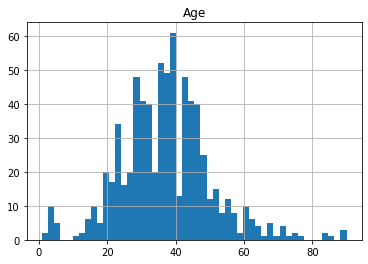

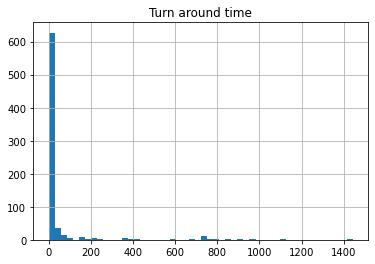

In [33]:
df.hist(column='Age', bins=50), df.hist(column='Turn around time', bins=50) #, df.hist(column='GeneXpert_results', bins=50),
#df.hist(column='Treatment Outcome', bins=50), df.hist(column='Sex', bins=50)



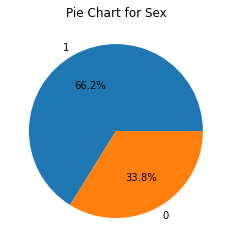

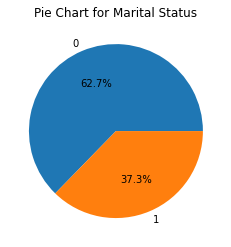

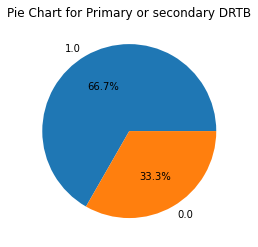

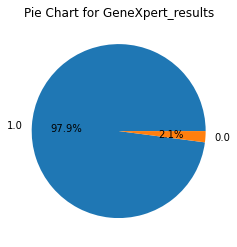

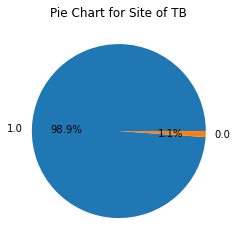

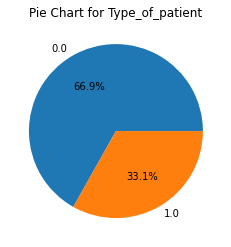

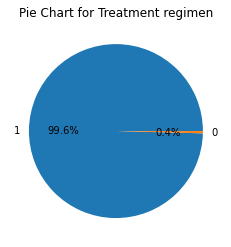

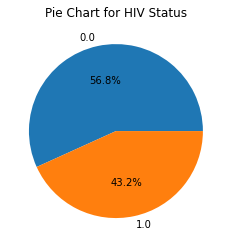

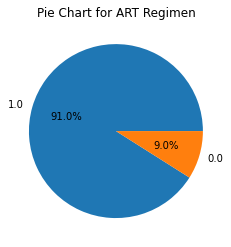

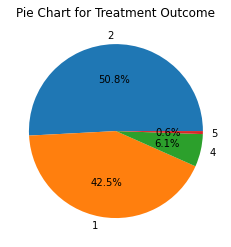

In [34]:
for col in df.columns:
    if col != 'Age' and col != 'Turn around time':
        sizes = df[col].value_counts()
        labels = sizes.index.values

        # Create pie chart for current column
        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, autopct='%1.1f%%')
        ax.set_title(f'Pie Chart for {col}')

        # Show the plot
        plt.show()

SyntaxError: keyword argument repeated: column (717263526.py, line 2)

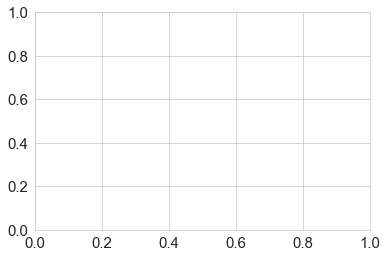

In [60]:
fig, ax = plt.subplots(1,1)
ax.scatter(column='Age',column='Treatment Outcome', marker='x', c='r')
ax.legend( fontsize='xx-large')
ax.set_ylabel('treatment Outcome', fontsize='xx-large')
ax.set_xlabel('Age', fontsize='xx-large')
plt.show()

### checking how the data features are corralated.
Here were are checking the corration of the features in our data frame.How related the features are to each other.

In [35]:
correlation=df.corr()
correlation

,Age,Sex,Marital Status,Turn around time,Primary or secondary DRTB,GeneXpert_results,Site of TB,Type_of_patient,Treatment regimen,HIV Status,ART Regimen,Treatment Outcome
Age,1.000000,0.154479,0.184135,-0.030742,-0.022056,0.134890,-0.004381,0.099347,-0.079881,-0.084128,0.011964,-0.043853
Sex,0.154479,1.000000,0.050509,0.029460,-0.052987,0.100911,-0.075597,0.112954,-0.000690,0.135046,0.030677,0.057163
Marital Status,0.184135,0.050509,1.000000,-0.066618,-0.024998,0.092118,-0.082422,-0.009118,-0.039182,-0.056078,0.012393,-0.058861
Turn around time,-0.030742,0.029460,-0.066618,1.000000,-0.015787,-0.015244,-0.007155,0.045897,0.016803,-0.014136,0.021094,0.073629
Primary or secondary DRTB,-0.022056,-0.052987,-0.024998,-0.015787,1.000000,-0.082167,-0.018589,-0.766520,-0.045565,0.078034,0.075497,0.116764
GeneXpert_results,0.134890,0.100911,0.092118,-0.015244,-0.082167,1.000000,-0.015375,0.081826,-0.009382,0.009490,-0.045681,0.057047
Site of TB,-0.004381,-0.075597,-0.082422,-0.007155,-0.018589,-0.015375,1.000000,-0.037837,-0.006818,0.065573,0.151686,0.044772
Type_of_patient,0.099347,0.112954,-0.009118,0.045897,-0.766520,0.081826,-0.037837,1.000000,0.045423,-0.128859,-0.097025,-0.040663
Treatment regimen,-0.079881,-0.000690,-0.039182,0.016803,-0.045565,-0.009382,-0.006818,0.045423,1.000000,0.056292,-0.020258,-0.023243
HIV Status,-0.084128,0.135046,-0.056078,-0.014136,0.078034,0.009490,0.065573,-0.128859,0.056292,1.000000,0.274072,0.010220


In [36]:
correlation=df.corr()

<AxesSubplot:>

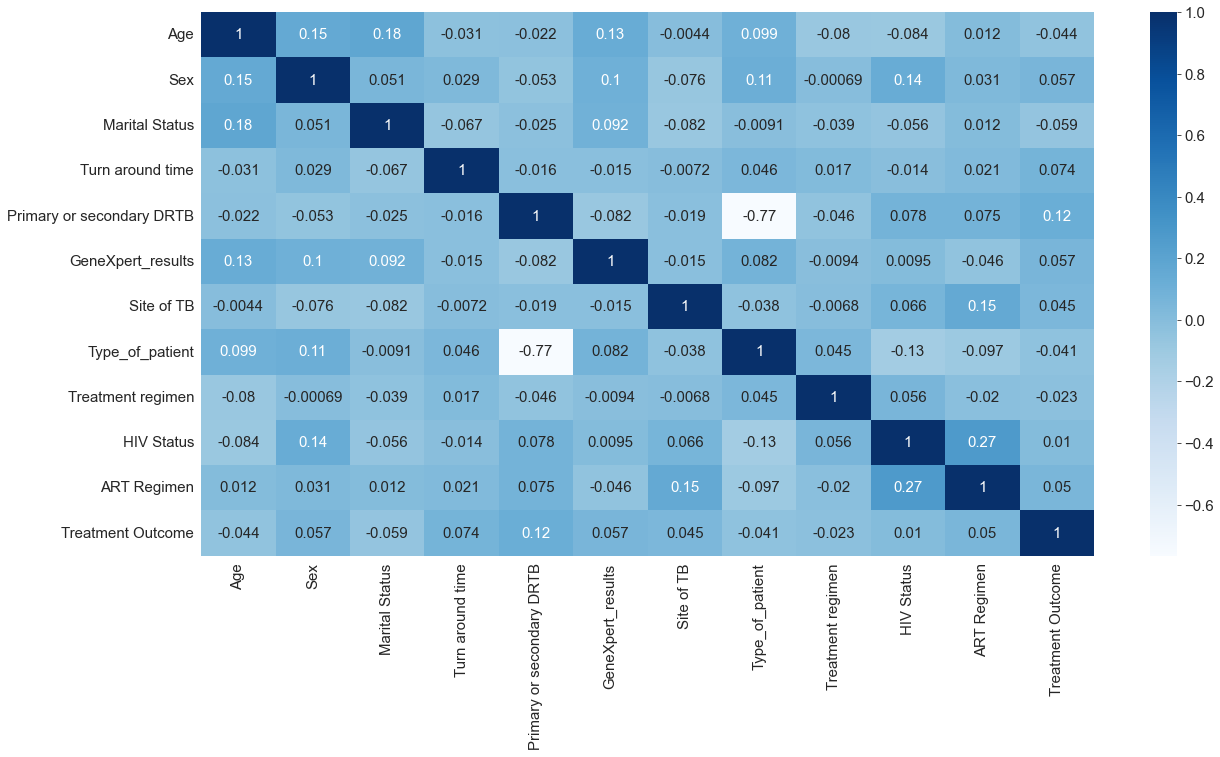

In [37]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(20,10))
matplotlib.rcParams['font.size']=15
sns.set_style('whitegrid')
sns.heatmap(correlation,annot=True,cmap='Blues')

### Converting the data frame to to an array or matix and we name it TBarray.

The data frame is converted to an array or matrix for easy manupulation and calculations is numpy.

In [38]:
TBarray=np.array(df)
TBarray[0:5]

#Creating a data frame, or rather an array

array([[41.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  2.],
       [34.,  0.,  1., 24.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  2.],
       [49.,  1.,  1., 18.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  2.],
       [20.,  0.,  0.,  5.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
       [41.,  0.,  0.,  3.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.]])

In [39]:
#print(Outcomes.dtype)  
print(TBarray.shape) # Checking the structure of an array, so this is a matrix with 92 rows and 7 columns)

(724, 12)


In [40]:
#Here were create X variable of feature.This features are used to predict the outcomes

X = df[['Age',
 'Sex',
 'Marital Status',
 'Turn around time',
 'Primary or secondary DRTB',
 'GeneXpert_results',
 'Site of TB',
 'Type_of_patient',
 'Treatment regimen',
 'HIV Status',
 'ART Regimen']].values
X[0:5] 



array([[41.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.],
       [34.,  0.,  1., 24.,  1.,  1.,  1.,  0.,  1.,  0.,  1.],
       [49.,  1.,  1., 18.,  1.,  1.,  1.,  0.,  1.,  0.,  1.],
       [20.,  0.,  0.,  5.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [41.,  0.,  0.,  3.,  1.,  1.,  1.,  0.,  1.,  0.,  0.]])

In [41]:
y = df['Treatment Outcome'].values
y[0:306]

array([2, 2, 2, 1, 1, 2, 4, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 5, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 4, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 4, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 4, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 4, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 5, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 4, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 4, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


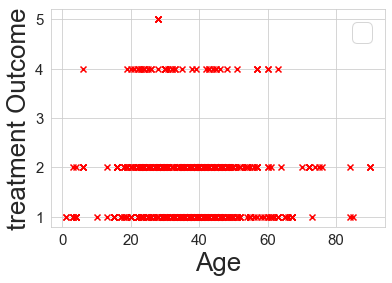

# Data Normalisations/feature scaling.

Why normalization is necessary in KNN ? Normalisation process normalizes the effect of all the features on the results but the 'K' nearest points to a particular point V before normalization will be EXACTLY SAME as the 'K' nearest points to that particular point V after normalization.

For classification algorithms like KNN, we measure the distances between pairs of samples and these distances are influenced by the measurement units also. For example: Let’s say, we are applying KNN on a data set having 3 features.First feature ranging from 1-10, second from 1-20 and the last one ranging from 1-1000. In this case, most of the clusters will be generated based on the last feature as the difference between 1 to 10 and 1-20 are smaller as compared to 1-1000. To avoid this miss classification, we should normalize the feature variables.

Any algorithm where distance play a vital role for prediction or classification, we should normalize the variable

In [42]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:20]

# Standardising our data.This is data normalisation
#Some algorithms require that data be normalized before training a model.
#Other algorithms perform their own data scaling or normalization. 
#Therefore, when you choose a machine learning algorithm to use in building a predictive model,
#be sure to review the data requirements of the algorithm before applying normalization to the training data

array([[ 0.28584089,  0.71517988, -0.7711768 , -0.25356118,  0.70637441,
         0.14545294,  0.10570328, -0.70417879,  0.06450494, -0.87267243,
         0.31406097],
       [-0.24055505, -1.39824963,  1.29671951, -0.09423509,  0.70637441,
         0.14545294,  0.10570328, -0.70417879,  0.06450494, -0.87267243,
         0.31406097],
       [ 0.88743626,  0.71517988,  1.29671951, -0.13579842,  0.70637441,
         0.14545294,  0.10570328, -0.70417879,  0.06450494, -0.87267243,
         0.31406097],
       [-1.29334695, -1.39824963, -0.7711768 , -0.2258523 ,  0.70637441,
         0.14545294,  0.10570328, -0.70417879,  0.06450494,  1.14590534,
         0.31406097],
       [ 0.28584089, -1.39824963, -0.7711768 , -0.23970674,  0.70637441,
         0.14545294,  0.10570328, -0.70417879,  0.06450494, -0.87267243,
        -3.18409509],
       [-0.91734984, -1.39824963, -0.7711768 , -0.2258523 ,  0.70637441,
         0.14545294,  0.10570328, -0.70417879,  0.06450494, -0.87267243,
         0.314

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (506, 11) (506,)
Test set: (218, 11) (218,)


# Hyperparameter optimization for K value

Finding the best value for K.The best value for K, is K with the lowest mean Error.From the graph below we note that when the value of k= 21 the error is low,therefore the best value for K= 21

In [44]:
error=[]

for i in range(1,60):
    knn =KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

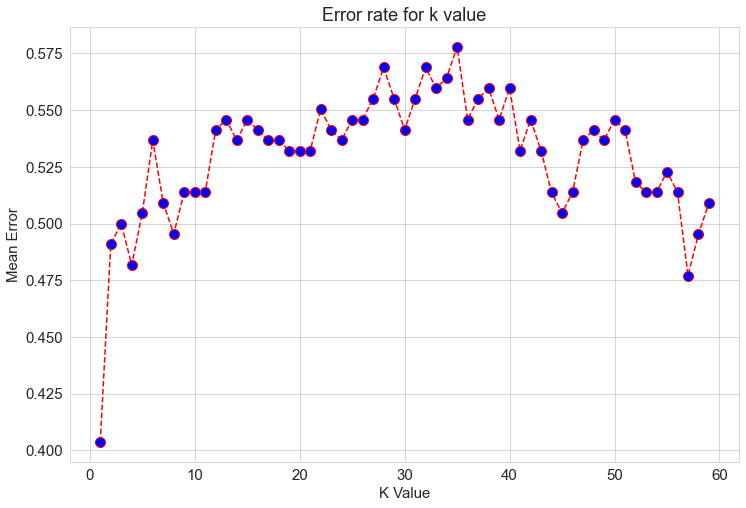

In [45]:
plt.figure(figsize=(12,8))
plt.plot(range(1,60), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor ='blue', markersize=10)
plt.title('Error rate for k value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

To check the best k,we can also use the mean accuracy(mean_acc).This will evaluation all the values of K-1 and produce the accuracy for k-1 values.You will note that the highest accuracy is 0.68 for k=21 (k=(22-1)=21)

In [221]:
#acuracy for different ks
Ks = 55
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.59633028, 0.50917431, 0.5       , 0.51834862, 0.49541284,
       0.46330275, 0.49082569, 0.50458716, 0.48623853, 0.48623853,
       0.48623853, 0.4587156 , 0.45412844, 0.46330275, 0.45412844,
       0.4587156 , 0.46330275, 0.46330275, 0.46788991, 0.46788991,
       0.46788991, 0.44954128, 0.4587156 , 0.46330275, 0.45412844,
       0.45412844, 0.44495413, 0.43119266, 0.44495413, 0.4587156 ,
       0.44495413, 0.43119266, 0.44036697, 0.43577982, 0.42201835,
       0.45412844, 0.44495413, 0.44036697, 0.45412844, 0.44036697,
       0.46788991, 0.45412844, 0.46788991, 0.48623853, 0.49541284,
       0.48623853, 0.46330275, 0.4587156 , 0.46330275, 0.45412844,
       0.4587156 , 0.48165138, 0.48623853, 0.48623853])

   # Model training.
   Training the model with the value  k=54

In [222]:
k = 54
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=54)

## Model testing
Below we are predicting the values of y(outcomes) using the data for testing.When tarining the model we only used the training dataset.This is due to the fact that the model should be trained on a separate dataset and trainined on the on the different dataset and tested on the test data set.Test dataset should be used to predict the values of y after tarining.

In [223]:
y_pred = neigh.predict(X_test)
y_pred

array([1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1],
      dtype=int64)

### Evaluating the accuracy of the model

In [224]:
score = neigh.score(X_test,y_test)
print("Training score: ", score) 

Training score:  0.48623853211009177


In [225]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5612648221343873
Test set Accuracy:  0.48623853211009177


In [226]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17 68  0  0]
 [27 89  0  0]
 [ 3 12  0  0]
 [ 2  0  0  0]]
              precision    recall  f1-score   support

           1       0.35      0.20      0.25        85
           2       0.53      0.77      0.62       116
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         2

    accuracy                           0.49       218
   macro avg       0.22      0.24      0.22       218
weighted avg       0.42      0.49      0.43       218



C:\Users\vsakala\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsakala\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsakala\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN Hyperparameter Optimization
First we will implement two helper functions, which map our solution vector to the parameters of the classifier, and construct said classifier

In [227]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from niapy.problems import Problem
from niapy.task import OptimizationType, Task
from niapy.algorithms.modified import HybridBatAlgorithm


def get_hyperparameters(x):
    """Get hyperparameters for solution `x`."""
    algorithms = ('ball_tree', 'kd_tree', 'brute')
    n_neighbors = int(5 + x[0] * 10)
    weights = 'uniform' if x[1] < 0.5 else 'distance'
    algorithm = algorithms[int(x[2] * 2)]
    leaf_size = int(10 + x[3] * 40)

    params =  {
        'n_neighbors': n_neighbors,
        'weights': weights,
        'algorithm': algorithm,
        'leaf_size': leaf_size
    }
    return params


def get_classifier(x):
    """Get classifier from solution `x`."""
    params = get_hyperparameters(x)
    return KNeighborsClassifier(**params)

Next, we need to write a custom problem class. As discussed, the problem will be 4 dimensional, with lower and upper bounds set to 0 and 1 respectively. The class will also store our training dataset, on which 2 fold cross validation will be performed. The fitness function, which we’ll be maximizing, will be the mean of the cross validation scores.

In [228]:
class KNNHyperparameterOptimization(Problem):
    def __init__(self, X_train, y_train):
        super().__init__(dimension=4, lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train

    def _evaluate(self, x):
        model = get_classifier(x)
        scores = cross_val_score(model, self.X_train, self.y_train, cv=2, n_jobs=-1)
        return scores.mean()

In [229]:
problem = KNNHyperparameterOptimization(X_train, y_train)

# We will be running maximization for 100 iters on `problem`
task = Task(problem, max_iters=100, optimization_type=OptimizationType.MAXIMIZATION)

algorithm = HybridBatAlgorithm(population_size=70, seed=1234)
best_params, best_accuracy = algorithm.run(task)

print('Best parameters:', get_hyperparameters(best_params))

Best parameters: {'n_neighbors': 14, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 29}


In [230]:
default_model = KNeighborsClassifier()
best_model = get_classifier(best_params)

default_model.fit(X_train, y_train)
best_model.fit(X_train, y_train)

default_score = default_model.score(X_test, y_test)
best_score = best_model.score(X_test, y_test)

print('Default model accuracy:', default_score)
print('Best model accuracy:', best_score)

Default model accuracy: 0.4954128440366973
Best model accuracy: 0.6146788990825688


C:\Users\vsakala\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


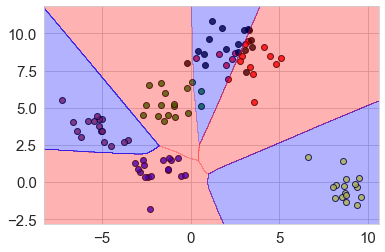

In [231]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

def plot_decision_regions(x, y, neigh, resolution = 0.02):
    markers = ('s', 'x', 'o', '^','v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y_pred))])

    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:,1].max() + 1
    
    xx1, xx2= np.meshgrid (np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = neigh.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha= 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

colors = ['red', 'blue', 'green','black','yellow','brown']
X, y = make_blobs(n_features=2, centers=6)

for idx, cl in enumerate (np.unique(y)):
    plt.scatter (x=X[y == cl, 0], y= X[y == cl, 1], alpha=0.8, c=colors[idx], label = cl, edgecolor = 'black')

neigh = MLPClassifier()
neigh.fit(X, y)

plot_decision_regions(X, y, neigh, resolution = 0.02)

In [232]:
Outcome_list=np.array(y_pred).tolist()
Outcome_list

[1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1]

In [233]:
for i in Outcome_list:
    if i==1.0:
        print('Completed')
    elif i==2.0:
        print('Died')
    elif i==3.0:
        print('LTFU')
    else:
        print('failed_treatment')

Completed
Died
Died
Died
Died
Died
Completed
Died
Died
Died
Died
Died
Completed
Died
Completed
Died
Died
Died
Died
Died
Completed
Completed
Died
Died
Died
Completed
Completed
Died
Completed
Died
Died
Died
Completed
Died
Died
Died
Died
Died
Completed
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Completed
Died
Died
Died
Died
Died
Completed
Died
Died
Completed
Completed
Died
Completed
Completed
Died
Died
Died
Completed
Died
Died
Died
Completed
Died
Died
Completed
Died
Completed
Died
Completed
Died
Completed
Completed
Died
Died
Completed
Died
Completed
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Completed
Died
Completed
Died
Died
Died
Died
Died
Died
Died
Died
Completed
Died
Died
Died
Completed
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Completed
Died
Died
Died
Died
Died
Died
Died
Died
Died
Died
Completed
Died
Died
Died
Died
Died
Died
Died
Died
Died
Completed
Died
Completed
Died
Died
Completed
Died
Compl

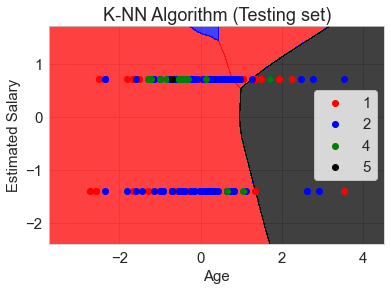

In [234]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mpl.contourf(x1, x2, neigh.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','blue','green','black' )))   
mpl.xlim(x1.min(), x1.max())  
mpl.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mpl.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red','blue','green','black'))(i), label = j)  
mpl.title('K-NN Algorithm (Testing set)')  
mpl.xlabel('Age')  
mpl.ylabel('Estimated Salary')  
mpl.legend()  
mpl.show()  

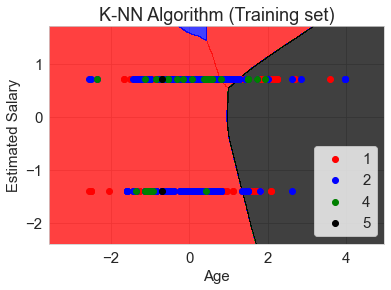

In [235]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mpl.contourf(x1, x2, neigh.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','blue','green','black' )))   
mpl.xlim(x1.min(), x1.max())  
mpl.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mpl.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red','blue','green','black'))(i), label = j)  
mpl.title('K-NN Algorithm (Training set)')  
mpl.xlabel('Age')  
mpl.ylabel('Estimated Salary')  
mpl.legend()  
mpl.show()

In [ ]:
# Import the necessary libraries
from tkinter import *
from PIL import ImageTk, Image
from sklearn.neighbors import KNeighborsClassifier

# Define the GUI window
root = Tk()
root.geometry("1910x1500")

# Load the image
image = Image.open("C:/Analytics & codes/Knn.JPG")

# Resize the image
image = image.resize((1500, 900), Image.ANTIALIAS)

# Create a PhotoImage object
photo = ImageTk.PhotoImage(image)

# Create a label to hold the image
image_label = Label(root, image=photo)
image_label.place(x=400, y=100)
image_label.pack()

#Creating the tittle of the form
Tittle_label = Label(root, text="DR-TB outcome prediction model ",font=("Arial", 30,"bold"),fg="blue")
Tittle_label.place(x=600, y=50)

# Define the input fields for the 11 features
feature1_label = Label(root, text="AGE  (enter number of years)")
feature1_label.place(x=600, y=180)
feature1 = Entry(root)
feature1.place(x=950, y=180)

feature2_label = Label(root, text="GENDER  (enter 0=Female and 1=Male )")
feature2_label.place(x=600, y=210)
feature2 = Entry(root)
feature2.place(x=950, y=210)

feature3_label = Label(root, text="MARITAL STATUS  (enter 0=not married and 1=married)")
feature3_label.place(x=600, y=240)
feature3 = Entry(root)
feature3.place(x=950, y=240)

feature4_label = Label(root, text="NUMBER OF DAYS BETWEEN Tx INITIATION AND DIAGNOSIS")
feature4_label.place(x=600, y=270)
feature4 = Entry(root)
feature4.place(x=950, y=270)

feature5_label = Label(root, text="TYPE OF DR_TB  (secondary=0 and primary=1)")
feature5_label.place(x=600, y=300)
feature5 = Entry(root)
feature5.place(x=950, y=300)

feature6_label = Label(root, text="DIAGNOSIS TYPE (GeneXpert= 1 and clinical=0)")
feature6_label.place(x=600, y=330)
feature6 = Entry(root)
feature6.place(x=950, y=330)


feature7_label = Label(root, text="DR_TB SITE  (pulmonary=1 and extrapulmonary=0)")
feature7_label.place(x=600, y=360)
feature7 = Entry(root)
feature7.place(x=950, y=360)

feature8_label = Label(root, text="TYPE OF DR_TB")
feature8_label.place(x=600, y=390)
feature8 = Entry(root)
feature8.place(x=950, y=390)

feature9_label = Label(root, text="ON DR-TB TREATMENT?  (yes=1 and no=0)")
feature9_label.place(x=600, y=420)
feature9 = Entry(root)
feature9.place(x=950, y=420)


feature10_label = Label(root, text="HIV STATUS  (negative=0 and positive=1)")
feature10_label.place(x=600, y=450)
feature10 = Entry(root)
feature10.place(x=950, y=450)

feature11_label = Label(root, text="ON ART TREATMENT?  (not on Tx=0 and on Tx=1)")
feature11_label.place(x=600, y=480)
feature11 = Entry(root)
feature11.place(x=950, y=480)

#feature12_label = Label(root, text="ART Regimen")
#feature12_label.place(x=50, y=350)
#feature12 = Entry(root)
#feature12.place(x=150, y=350)

# Repeat for the remaining features

# Define the output label
output_label = Label(root, text="Predicted label",font=("Arial", 12,"bold"))
output_label.place(x=1100, y=180)

# Define the predict function
def predict():
    # Get the input values for the 11 features
    feature_values = [
        float(feature1.get()),
        float(feature2.get()),
        float(feature3.get()),
        float(feature4.get()),
        float(feature5.get()),
        float(feature6.get()),
        float(feature7.get()),
        float(feature8.get()),
        float(feature9.get()),
        float(feature10.get()),
        float(feature11.get()),
        #float(feature12.get()),
        
        # Repeat for the remaining features
    ]
    # Create a KNN classifier object and fit it to the training data
    #knn = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, y_train)
    # Make the prediction using the KNN model
    prediction = neigh.predict([feature_values])[0]
    # Update the output label with the predicted label
    if prediction == 1.0:
        prediction=('Cured')
        output_label.config(text=f"Predicted label: {prediction}",font=("Arial", 12,"bold"),fg="green")
    elif prediction == 2.0:
        prediction=('Likely to Die')
        output_label.config(text=f"Predicted label: {prediction}",font=("Arial", 12,"bold"),fg="red")
    elif prediction == 3.0:
        prediction=('Likely to be LTFU')
    else:
        prediction=('Likely to fail_treatment')   

    
    
    #output_label.config(text=f"Predicted label: {prediction}",font=("Arial", 12,"bold"),fg="red")
    
# Define the predict button
predict_button = Button(root, text="Predict", command=predict,font=("Arial", 15,"bold"))
predict_button.place(x=950, y=550)

# Start the GUI main loop
root.mainloop()

C:\Users\vsakala\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0